
# Project: Investigate a Dataset No-Show  Medical appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

<div class="alert alert-block alert-info">
    <p><b><h1>Introduction</h1></p>


Regarding for my decide to choose this dataset , For that  project I'll analysis the Medical Appointment No Shows dataset, it’s a dataset who holds informations about 110527 rows, 14 important feature column for medical appointments of different patients from different neighborhoods in Brazil.
This dataset is built for the purpose of finding out the reasons that made patients  was not showed up at their scheduled appointment. 
You can see more details about the 14 data's features in the table below:</div>

<div class="alert alert-block alert-info">
    <b>Tip:</b> <b>(dataset breif) notes.</b> 
<p>So, it contains one dependent variable called No-Show to show the decision which take the ‘No’ cardinality when the patient shows up at the scheduled appointment and ‘Yes’ when he don't show up, and to understand the reasons for this behavior, 13 other independent variables were collected in parallel with the main information, which is the showing up or not at each medical appointment.</p>

</div>

| N | Feature | Description |
| :- | -: | :-: |
| 1 | PatientId |Identification of a patient|
| 2 | AppointmentID |The day someone called or registered the appointment, this is before appointment of course.|
| 3 | Gender |Male or Female. Female is the greater proportion, woman takes way more care of they health in comparison to man.|
| 4 | ScheduledDay |The day of the actuall appointment, when they have to visit the doctor.|
| 5 | AppointmentDay |The day someone called or registered the appointment, this is before appointment of course.|
| 6 | Age | How old is the patient.|
| 7 | Neighbourhood | Where the appointment takes place.|
| 8 | Scholarship |True of False . Observation, this is a broad topic|
| 9 | Hipertension | True or False|
| 10 | Diabetes | True or False|
| 11 | Alcoholism | True or False|
| 12 | Handcap	 | True or False|
| 13 | SMS_received | 1 or more messages sent to the patient.|
| 14 | No-show	 |No' the patient showed up;'Yes' for a no-show|


<div class="alert alert-block alert-warning">
<b>dependent And independent </b> 
In This Project will be purely descriptive,and i will focus on only 9 variables, one dependent variable called <b>No-show</b> and 7 independents variables which are :<b> Gender, Age,scheduled_day, Scholarship, Hipertension, Diabetes,Alcoholism,Handcap,sms_received.</b>
</div>

<div class="alert alert-block alert-info">
    <p><b>Main question:</b></p>
</div>

What are the factors that may cause patients not to show up at their scheduled medical appointments?


<div class="alert alert-block alert-info">
    <p><b>Intermediate questions</b></p>
</div>

<ul>
<li><a href="#1">1- how manye number of patients appears  for  patient (showed up,no-show) ?</a></li>
<li><a href="#2">2- How many number of patients gender (female and are male)? </a></li>
<li><a href="#3">3- what's the Rate of no-showing up regarding for each Gender?</a></li>
<li><a href="#4">4- How many number of patients gender (female and are male) regarding for age category</a></li>
<li><a href="#5">5- Ishow and retreive the table that has  no-showing rate for each age category?</a></li>
<li><a href="#6">6- Collect How many patients have( hypertension / don't have it)?</a></li>
<li><a href="#7">7- what's the rate of no-showing up at the appointment for each situation of diseases feature ?</a></li>
<li><a href="#8">8- what the corrlation between (age/Alcoholism)and that will effect into of no-showing up at the appointment? </a></li>
<li><a href="#9">9- what the corrlation between (age / Handcap)and that will effect into of no-showing up at the appointment? </a></li>
<li><a href="#10">10-what the corrlation between (age / gender)and that will effect into of no-showing up at the appointment?</a></li>
</ul>


#####  Loading  libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')


<a id='wrangling'></a>

<div class="alert alert-block alert-info">
    <p><b><h1>Data Wrangling</p6></h1></p>
</div>


####  gathering data 


In [2]:

df_medical=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df_medical.head(2)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
df_medical.shape

(110527, 14)

#### get information about data

missing data will appear following that code 

In [4]:

df_medical.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# checking for missing values
df_medical.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

##### observation:
No Missing Data Appear because all count is zero number and salse for another function .any()

In [6]:
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### observations:

- Features name will renamed again.
- no missed Data.
- "PatientId" data type error format that should be change  from 'float' to 'int' that standard naming of any id .
- the data type format of 'ScheduledDay' and 'AppointmentDay' an error format, it manadtory change into 'datetime'format.
- the variables ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show] are Categorical Data


----------------------------------------------------

#### Some Observation for each feature 

- tring for analysis the age column to retrieve outlier data  
- outlier data effect for badly way into the dataset 

In [7]:
# check the age datas by order
df_age = df_medical['Age'].unique()
df_age.sort()
print('age', df_age)

age [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


To make sure above i will apply below code to extract outliers

In [8]:
df_medical[df_medical.Age < 0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
# count appointment numbers for each age
df_medical['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

#### observations:
that show one of patient up-normal data the will be outlier more way to handle that but for now i will dorp it in next step in the cleaning data
so i will do for that values i ages 
<b>Some outlier under 0 age (that not logical but we can accept if that babes still on his mother )and more than 100 years because that not normal age in all human for this days so i will drop it</b>

In [10]:
# checking for duplicate data
df_medical.duplicated().sum()

0

#### observations:
that show No Any duplicated any value foe All Rows 

_________________________

Below I will show all unique Values for each Feature (columns) that filter to me who is will be categorical data in each value also to retrieve what will be important to me or has been droped 

In [11]:
# verify the dataset if all changes are done
df_medical.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

observation 
for the beganing i will work for 7 independent  variable and i will ignore(PatientId,AppointmentID,Neighbourhood,AppointmentDay )
so i observe the Handcap  5 class

count the appointment numbers for each handicap level from 0 to 4 

In [12]:

df_medical['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

#### observation 
class 2 and 3 and 4 is outlier values so i will group it into group number 1 

In [13]:
# modify all values > 1 in 'Handicap' column to 1
df_medical.loc[df_medical.Handcap > 1, 'Handcap'] = 1
# verify if Handicap column contains only two values 0 or 1
df_medical['Handcap'].value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

now the Handcap is two class (0,1)


In [14]:
# verify the dataset if all changes are done
df_medical.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                2
SMS_received           2
No-show                2
dtype: int64

now i make sure that is the Handcap is two class (0,1)

--------------------------------------
--------------------------------------
--------------------------------------

<b>i exclude this Feaatures{ 'PatientId' ,'AppointmentID' ,'ScheduledDay','AppointmentDay','Neighbourhood' }</b>Because this some there numaric value and other more string value like Neighbourhood that 82 categorical data and also remider features i execlude it 

In [15]:
print('Only ',df_medical.Gender.nunique()," Unique Values in `Gender`=>" , df_medical.Gender.unique())
print('Only ',df_medical.Scholarship.nunique()," Unique Values in `Scholarship`=>" , df_medical.Scholarship.unique())
print('Only ',df_medical.Hipertension.nunique()," Unique Values in `Hipertension`=>" , df_medical.Hipertension.unique())
print('Only ',df_medical.Diabetes.nunique()," Unique Values in `Diabetes`=>" , df_medical.Diabetes.unique())
print('Only ' ,df_medical.Alcoholism.nunique()," Unique Values in `Alcoholism'=>" , df_medical.Alcoholism.unique())
print('Only ',df_medical.Handcap.nunique()," Unique Values in `Handcap`=>" , df_medical.Handcap.unique())
print('Only ',df_medical.SMS_received.nunique()," Unique Values in `SMS_received`=>" , df_medical.SMS_received.unique())
print('Only ',df_medical['No-show'].nunique()," Unique Values in `No-show`=>" , df_medical['No-show'].unique())


Only  2  Unique Values in `Gender`=> ['F' 'M']
Only  2  Unique Values in `Scholarship`=> [0 1]
Only  2  Unique Values in `Hipertension`=> [1 0]
Only  2  Unique Values in `Diabetes`=> [0 1]
Only  2  Unique Values in `Alcoholism'=> [0 1]
Only  2  Unique Values in `Handcap`=> [0 1]
Only  2  Unique Values in `SMS_received`=> [0 1]
Only  2  Unique Values in `No-show`=> ['No' 'Yes']



### Data Cleaning (Replace this with more specific notes!)

#### first step for the last Observation in last section 


<div class="alert alert-block alert-warning">

- Renaming to relevant column names
- Converting variables to the correct data types
- Brainstorm some questions
</div>

In [16]:
[column for column in df_medical]

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [17]:
# Rename incorrect columns' names and makes it all a lower case
new_lables = ['patient Id', 'appointment id', 'gender', 'scheduled day',
       'appointment day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms received', 'appointment']
df_medical.columns = new_lables

In [18]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_medical.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_medical.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Convert Patient_Id from Float to Integer because patient id must be unique and integer value as standard defination for create any ID 

In [19]:

df_medical['patient_id'] = df_medical['patient_id'].astype('int64')

 convert all the categorical variables Data from 'int' to 'category' type because Categorical data is a collection of information that is divided into groups

##### Types of Categorical Data 
- Nominal Data
- Ordinal Data

below we will convert binary value into categorical value 

| N | Feature | Categorical |
| :- | -: | :-: |
| 1 | Gender |['F','M']|
| 2 | Scholarship |[0 1]|
| 3 | Hipertension |[1 0]|
| 4 | Diabetes |[0 1]|
| 5 | Alcoholism |[0 1]|
| 6 | Handcap |[0 1]|
| 7 | SMS_received |[0 1]|
| 8 | No-Show |['No',Yes']|

In [20]:
df_medical['gender'] = df_medical['gender'].astype('category')
df_medical['scholarship'] = df_medical['scholarship'].astype('category')
df_medical['hypertension'] = df_medical['hypertension'].astype('category')
df_medical['diabetes'] = df_medical['diabetes'].astype('category')
df_medical['alcoholism'] = df_medical['alcoholism'].astype('category')
df_medical['handicap'] = df_medical['handicap'].astype('category')
df_medical['sms_received'] = df_medical['sms_received'].astype('category')
df_medical['appointment'] = df_medical.appointment.astype('category')

In [21]:

df_medical.gender.cat.rename_categories(['Female','Male'], inplace = True)
df_medical.scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)
df_medical.hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)
df_medical.diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);
df_medical.alcoholism.cat.rename_categories(['No alcoholism','alcoholism'], inplace = True)
df_medical.handicap.cat.rename_categories(['No handicap','handicap'], inplace = True);
df_medical.sms_received.cat.rename_categories(['No sms_received','sms_received'], inplace = True)
df_medical.appointment.cat.rename_categories(['Show','No Show'], inplace = True)

In [22]:
# Convert 'scheduled_day' and 'appointment_day' from 'object' type to 'datetime64[ns]'
df_medical['scheduled_day'] = pd.to_datetime(df_medical['scheduled_day']).dt.date.astype('datetime64[ns]')
df_medical['appointment_day'] = pd.to_datetime(df_medical['appointment_day']).dt.date.astype('datetime64[ns]')

df_medical.head()


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment
0,29872499824296,5642903,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No Scholarship,Hypertension,No Diabetes,No alcoholism,No handicap,No sms_received,Show
1,558997776694438,5642503,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No Scholarship,No Hypertension,No Diabetes,No alcoholism,No handicap,No sms_received,Show
2,4262962299951,5642549,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No Scholarship,No Hypertension,No Diabetes,No alcoholism,No handicap,No sms_received,Show
3,867951213174,5642828,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No Scholarship,No Hypertension,No Diabetes,No alcoholism,No handicap,No sms_received,Show
4,8841186448183,5642494,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No Scholarship,Hypertension,Diabetes,No alcoholism,No handicap,No sms_received,Show


In [23]:
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null category
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null category
hypertension       110527 non-null category
diabetes           110527 non-null category
alcoholism         110527 non-null category
handicap           110527 non-null category
sms_received       110527 non-null category
appointment        110527 non-null category
dtypes: category(8), datetime64[ns](2), int64(3), object(1)
memory usage: 5.9+ MB


In [24]:
# Row with incorrect age value (-1)
incorrect_row = df_medical[df_medical['age'] == -1].index
print(df_medical.shape)
df_medical[df_medical['age'] == -1]

(110527, 14)


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment
99832,465943158731293,5775010,Female,2016-06-06,2016-06-06,-1,ROMÃO,No Scholarship,No Hypertension,No Diabetes,No alcoholism,No handicap,No sms_received,Show


In [25]:
# Removing the row with incorrect age value (-1)
df_medical.drop(incorrect_row ,axis=0,inplace=True)
print(df_medical.shape)
df_medical[df_medical.age == -1]

(110526, 14)


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment


In [26]:
# create 'age_category' variable for make the analysis easier
df_medical['age_category'] = pd.cut(df_medical.age,bins=[-1,2,19,39,40,79,97,116],labels=['0 - 2','3 - 19','20 - 39','40 - 59', '60 - 79','80 - 97','98-115'],)


In [27]:
# Trimming data regarding the variables needed in my research questions
df_medical = df_medical.iloc[: , np.r_[2:4,5:6,7:15]]

df_medical.head()

,gender,scheduled_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,appointment,age_category
0,Female,2016-04-29,62,No Scholarship,Hypertension,No Diabetes,No alcoholism,No handicap,No sms_received,Show,60 - 79
1,Male,2016-04-29,56,No Scholarship,No Hypertension,No Diabetes,No alcoholism,No handicap,No sms_received,Show,60 - 79
2,Female,2016-04-29,62,No Scholarship,No Hypertension,No Diabetes,No alcoholism,No handicap,No sms_received,Show,60 - 79
3,Female,2016-04-29,8,No Scholarship,No Hypertension,No Diabetes,No alcoholism,No handicap,No sms_received,Show,3 - 19
4,Female,2016-04-29,56,No Scholarship,Hypertension,Diabetes,No alcoholism,No handicap,No sms_received,Show,60 - 79


<a id='eda'></a>

<a id='intro'></a>

<div class="alert alert-block alert-info">
    <p><b><h1> Exploratory Data Analysis</h1></p></div>





<a id='1'></a>
<div class="alert alert-block alert-warning">
    <p><b> 
1- how manye number of patients appears  for  patient (showed up,no-show) ?</p></div>


In [28]:
# number of patients grouping by 'appointment' variable
G_Patient= df_medical.groupby('appointment')['appointment'].count()
sum_G_Patient = G_Patient.sum()
print(G_Patient)
print('\n Total Number from ',sum_G_Patient,' patents:- \n there are ', G_Patient[1], ' patients showed up , which represents', 
      np.round(G_Patient[1]/sum_G_Patient,4)*1000, '% of the total sum,','\n and ',G_Patient[0], ' patients no show, which represents', 
      np.round(G_Patient[0]/sum_G_Patient,4)*1000, '% of the total sum.')

appointment
Show       88207
No Show    22319
Name: appointment, dtype: int64

 Total Number from  110526  patents:- 
 there are  22319  patients showed up , which represents 201.9 % of the total sum, 
 and  88207  patients no show, which represents 798.1 % of the total sum.


Show The Details and breif describtion of how manye number of patients appears for patient (showed up,no-show)
patient_group with index group/sum of all G_Patient,4)*100,

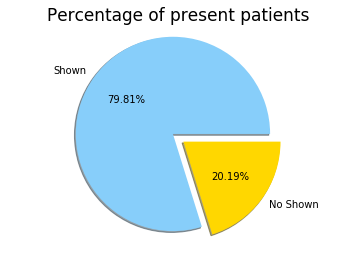

In [29]:
# draw a pie graph to show the percentage of the patients presented or not
sizes = np.array([G_Patient[0], G_Patient[1]])
labels = 'Shown', 'No Shown'
colors = ["lightskyblue", "gold"]
explode = [0.2, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 1.5)
plt.title('Percentage of present patients', fontsize = 17, loc = 'center', color = 'k')
plt.axis('equal') # equal aspect ratio to ensure that pie is drawn as a circle
plt.show()



79.8% of the total patients showed up at their appointments.
20.2% of the total patients not showed up at their appointments.


<a id='2'></a>
<div class="alert alert-block alert-warning">
    <p><b> 
2- How many number of patients gender (female and are male) and also regarding for age category  ?</p></div>




In [30]:
df_medical.groupby('gender').appointment.agg(['count'])

,count
gender,
Female,71839
Male,38687


                     count
age_category gender       
0 - 2        Female   3566
             Male     3864
3 - 19       Female  12511
             Male    10470
20 - 39      Female  20897
             Male     7973
40 - 59      Female    923
             Male      479
60 - 79      Female  31658
             Male    14822
80 - 97      Female   2269
             Male     1076
98-115       Female     15
             Male        3


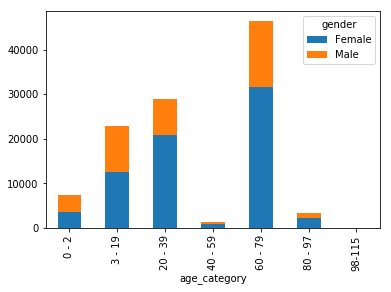

count    31658
dtype: int64

In [31]:
plot2=df_medical.groupby(['age_category','gender']).gender.agg(['count'])
print(plot2)
df_medical.groupby(['age_category','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

plot2.max()

another method 

In [32]:
# number of patients grouping by 'gender' variable
G_gender = df_medical.groupby('gender')['gender'].count()
sum_G_gender = G_gender.sum()
print(G_gender)
print('\n Total Of  ',sum_G_gender,' patents, there are ', G_gender[0], ' female, which represents', 
      round(G_gender[0]/sum_G_gender,1)*100, '% of the total,','\n and ',G_gender[1], ' male, which represents', 
      round(G_gender[1]/sum_G_gender,1)*100, '% of the total.')

gender
Female    71839
Male      38687
Name: gender, dtype: int64

 Total Of   110526  patents, there are  71839  female, which represents 60.0 % of the total, 
 and  38687  male, which represents 40.0 % of the total.


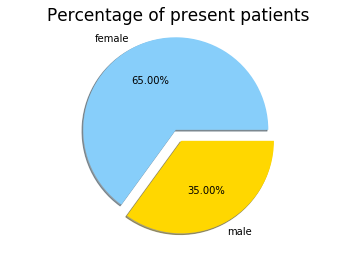

In [33]:
# draw a pie graph to show the percentage of the patients presented or not
sizes = np.array([G_gender[0], G_gender[1]])
labels = 'female', 'male'
colors = ["lightskyblue", "gold"]
explode = [0.2, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 1.5)
plt.title('Percentage of present patients', fontsize = 17, loc = 'center', color = 'k')
plt.axis('equal') 
plt.show()



- 65% of total patients are females.
- 35% of total patients are males.



<a id='3'></a>
<div class="alert alert-block alert-warning">
    <p><b> 
3-what's the Rate of no-showing up regarding for each Gender?</p></div>


In [34]:
plot2=df_medical.groupby(['gender','appointment']).appointment.agg(['count'])
plot2

count
gender appointment       
Female Show         57245
       No Show      14594
Male   Show         30962
       No Show       7725

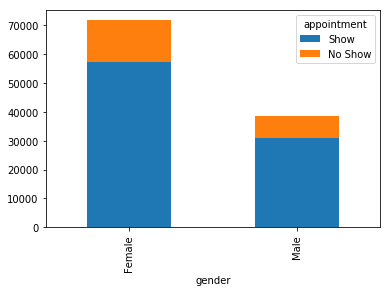

In [35]:
df_medical.groupby(['gender','appointment']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [36]:
# unique values
print(df_medical.age.nunique())
np.sort(df_medical.age.unique())

103


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

observation:

there are 103 different ages.

In [37]:
# frequency 
df_medical.age_category.value_counts()

60 - 79    46480
20 - 39    28870
3 - 19     22981
0 - 2       7430
80 - 97     3345
40 - 59     1402
98-115        18
Name: age_category, dtype: int64

the most frequent age is 0, i think  there are a babies and that under one year i think they register it 0 for that 

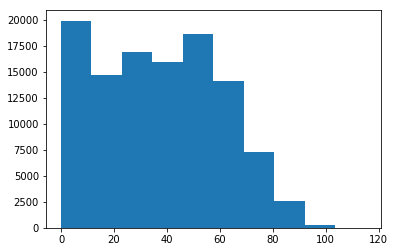

In [38]:
# simple histogram of 'age' variable
plt.hist(df_medical.age,bins=10);

 visualize  two dataframes frames one for 'female' and another for 'male'


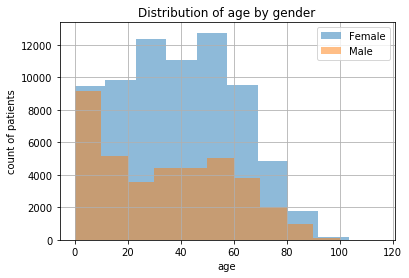

In [39]:
female = df_medical[df_medical.gender == 'Female']
male = df_medical[df_medical.gender == 'Male']
# histogram for each Gender
female.age.hist(label='Female', alpha=0.5, bins=10)
male.age.hist(label='Male', alpha=0.5, bins=10)
plt.ylabel('count of patients')
plt.xlabel('age')
plt.title('Distribution of age by gender')
plt.legend();

observation:
i think the duration of children i think male and female the same but after that the number of distribution for female more than the males 


<a id='4'></a>
<div class="alert alert-block alert-warning">
    <p><b> 
4- How many number of patients gender (female and are male) regarding for age category ?</p></div>

In [40]:
G_age = df_medical.groupby('age_category')['age_category'].count()
sum_G_age = G_age.sum()
print(G_age)
print('\n From ',sum_G_age,' patents, there are: \n -', G_age[0], ' in [0 - 2] category, which represents', 
      round(G_age[0]/sum_G_age,3)*100, '% of the total,\n -', G_age[1], ' in [3 - 19] category, which represents', 
      round(G_age[1]/sum_G_age,3)*100, '% of the total,\n -', G_age[2], ' in [20 - 39] category, which represents', 
      round(G_age[2]/sum_G_age,3)*100, '% of the total,\n -', G_age[3], ' in [40 - 59] category, which represents', 
      round(G_age[3]/sum_G_age,4)*100, '% of the total,\n -', G_age[4], ' in [60 - 79] category, which represents', 
      round(G_age[4]/sum_G_age,3)*100, '% of the total,\n -', G_age[5], ' in [80 - 97] category, which represents', 
      round(G_age[5]/sum_G_age,4)*100, '% of the total,\n -', G_age[6], ' in [98 - 115] category, which represents', 
      round(G_age[6]/sum_G_age,4)*100, '% of the total,')

age_category
0 - 2       7430
3 - 19     22981
20 - 39    28870
40 - 59     1402
60 - 79    46480
80 - 97     3345
98-115        18
Name: age_category, dtype: int64

 From  110526  patents, there are: 
 - 7430  in [0 - 2] category, which represents 6.7 % of the total,
 - 22981  in [3 - 19] category, which represents 20.8 % of the total,
 - 28870  in [20 - 39] category, which represents 26.1 % of the total,
 - 1402  in [40 - 59] category, which represents 1.27 % of the total,
 - 46480  in [60 - 79] category, which represents 42.1 % of the total,
 - 3345  in [80 - 97] category, which represents 3.03 % of the total,
 - 18  in [98 - 115] category, which represents 0.02 % of the total,


observations: according to this bar chart of age category, we notice that:

- the two categories ([0 - 39] and [60 - 79]) are the most frequent,
- the category of  ([80 - 97]) is the least frequent.
- [98-115] outlier data and i recommend to drop but i saved it 


-------------------------------------------------

<a id='5'></a>
<div class="alert alert-block alert-warning"> 
    <b>5- show and retreive the table that has  no-showing rate for each age category?</b></div>

number of patients grouping by 'age_category' 


In [41]:
G_scholarship = df_medical.groupby('scholarship')['scholarship'].count()
sum_G_scholarship = G_scholarship.sum()
print(G_scholarship)
print('\n Number of  ',sum_G_scholarship,' patents, there are ', G_scholarship[1], ' who have a scholarship, which represents', 
      round(G_scholarship[1]/sum_G_scholarship,3)*100, '% of the total,','\n and ',G_scholarship[0], ' who haven not a scholarship, which represents', 
      round(G_scholarship[0]/sum_G_scholarship,3)*100, '% of the total.')

scholarship
No Scholarship    99665
Scholarship       10861
Name: scholarship, dtype: int64

 Number of   110526  patents, there are  10861  who have a scholarship, which represents 9.8 % of the total, 
 and  99665  who haven not a scholarship, which represents 90.2 % of the total.


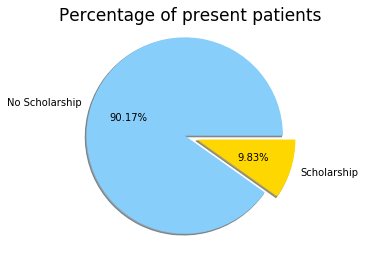

In [42]:
# draw a pie graph to show the percentage of the patients presented or not
sizes = np.array([G_scholarship[0], G_scholarship[1]])
labels = 'No Scholarship', 'Scholarship'
colors = ["lightskyblue", "gold"]
explode = [0.2, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 1.5)
plt.title('Percentage of present patients', fontsize = 17, loc = 'center', color = 'k')
plt.axis('equal') 
plt.show()

In [43]:
# number of patients grouping by 'hypertension' variable
hy = df_medical.groupby('hypertension')['hypertension'].count()
sumhy = hy.sum()
print(hy)
print('\n From ',sumhy,' patents, there are ', hy[1], ' who have an hypertension, which represents', 
      round(hy[1]/sumhy,3)*100, '% of the total,','\n and ',hy[0], ' who haven not an hypertension, which represents', 
      round(hy[0]/sumhy,4)*100, '% of the total.')

hypertension
No Hypertension    88725
Hypertension       21801
Name: hypertension, dtype: int64

 From  110526  patents, there are  21801  who have an hypertension, which represents 19.7 % of the total, 
 and  88725  who haven not an hypertension, which represents 80.28 % of the total.


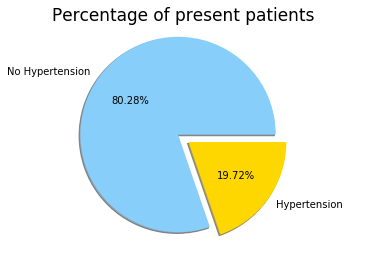

In [44]:
# draw a pie graph to show the percentage of the patients presented or not
sizes = np.array([hy[0], hy[1]])
labels = 'No Hypertension', 'Hypertension       '
colors = ["lightskyblue", "gold"]
explode = [0.2, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 1.5)
plt.title('Percentage of present patients', fontsize = 17, loc = 'center', color = 'k')
plt.axis('equal') 
plt.show()

In [45]:
G_d = df_medical.groupby('diabetes')['diabetes'].count()
sumG_d = G_d.sum()
print(G_d)
print('\n number of  ',sumG_d,' patents, there are ', G_d[1], ' who have an diabetes, which represents', 
      round(G_d[1]/sumG_d,4)*100, '% of the total,','\n and ',G_d[0], ' who haven not an diabetes, which represents', 
      round(G_d[0]/sumG_d,4)*100, '% of the total.')

diabetes
No Diabetes    102583
Diabetes         7943
Name: diabetes, dtype: int64

 number of   110526  patents, there are  7943  who have an diabetes, which represents 7.19 % of the total, 
 and  102583  who haven not an diabetes, which represents 92.81 % of the total.


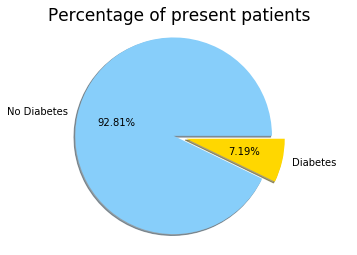

In [46]:
sizes = np.array([G_d[0], G_d[1]])
labels = 'No Diabetes', 'Diabetes'
colors = ["lightskyblue", "gold"]
explode = [0.2, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 1.5)
plt.title('Percentage of present patients', fontsize = 17, loc = 'center', color = 'k')
plt.axis('equal') 
plt.show()

In [47]:
df_medical.columns

Index(['gender', 'scheduled_day', 'age', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'appointment',
       'age_category'],
      dtype='object')

<a id='6'></a>
<div class="alert alert-block alert-warning"> 
    <b>6-Collect How many patients have( hypertension / don't have it)?</b></div>


hypertension
No Hypertension    88725
Hypertension       21801
Name: hypertension, dtype: int64

 number of   110526  patents, there are  21801  who have an diabetes, which represents 19.72 % of the total, 
 and  88725  who haven not an diabetes, which represents 80.28 % of the total.


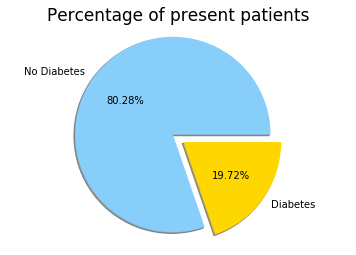

In [48]:
G_h= df_medical.groupby('hypertension')['hypertension'].count()
sumG_h = G_h.sum()
print(G_h)
print('\n number of  ',sumG_h,' patents, there are ', G_h[1], ' who have an diabetes, which represents', 
      round(G_h[1]/sumG_h,4)*100, '% of the total,','\n and ',G_h[0], ' who haven not an diabetes, which represents', 
      round(G_h[0]/sumG_h,4)*100, '% of the total.')
sizes = np.array([G_h[0], G_h[1]])
labels = 'No Diabetes', 'Diabetes'
colors = ["lightskyblue", "gold"]
explode = [0.2, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 1.5)
plt.title('Percentage of present patients', fontsize = 17, loc = 'center', color = 'k')
plt.axis('equal') 
plt.show()

                             count
hypertension    appointment       
No Hypertension Show         70178
                No Show      18547
Hypertension    Show         18029
                No Show       3772


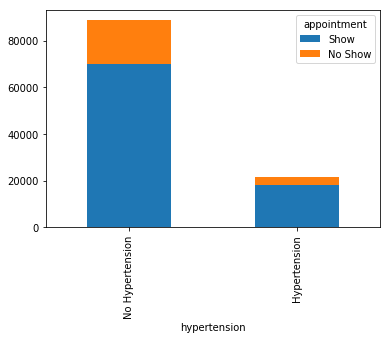

In [49]:
plot2=df_medical.groupby(['hypertension','appointment']).hypertension.agg(['count'])
print(plot2)
df_medical.groupby(['hypertension','appointment']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Hypertension for no_show ver low more than else

<a id='7'></a>
<div class="alert alert-block alert-warning"> 
    <b>7- what's the rate of no-showing up at the appointment for each situation of diseases feature  by age category?</b></div>


                                          count
age_category hypertension    appointment       
0 - 2        No Hypertension Show          6124
                             No Show       1306
3 - 19       No Hypertension Show         17516
                             No Show       5422
             Hypertension    Show            30
                             No Show         13
20 - 39      No Hypertension Show         20947
                             No Show       6367
             Hypertension    Show          1243
                             No Show        313
40 - 59      No Hypertension Show           941
                             No Show        266
             Hypertension    Show           160
                             No Show         35
60 - 79      No Hypertension Show         23582
                             No Show       5009
             Hypertension    Show         14851
                             No Show       3038
80 - 97      No Hypertension Show       

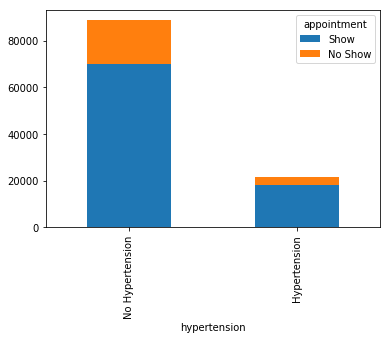

count    23582
dtype: int64

In [50]:
plot2=df_medical.groupby(['age_category','hypertension','appointment']).hypertension.agg(['count'])
print(plot2)
df_medical.groupby(['hypertension','appointment']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

plot2.max()

observation 

- 60 - 79      No Hypertension Show         23582
<p>
most frequency ages between 60-79 for  No Hypertension and appear in appointment that mean that duration of age and not has any Hypertension able to show an  appointment</p>

                         count
diabetes    appointment       
No Diabetes Show         81694
            No Show      20889
Diabetes    Show          6513
            No Show       1430


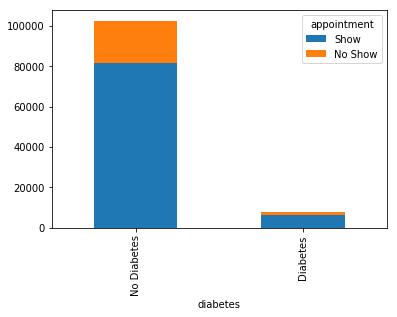

In [51]:
plot2=df_medical.groupby(['diabetes','appointment']).hypertension.agg(['count'])
print(plot2)
df_medical.groupby(['diabetes','appointment']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

                           count
alcoholism    appointment       
No alcoholism Show         85524
              No Show      21642
alcoholism    Show          2683
              No Show        677


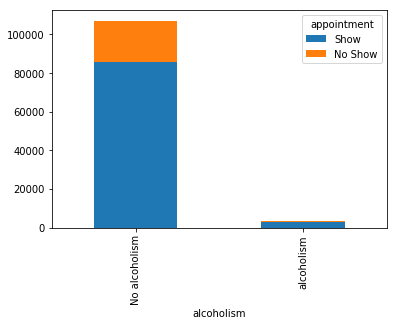

In [52]:
plot2=df_medical.groupby(['alcoholism','appointment']).hypertension.agg(['count'])
print(plot2)
df_medical.groupby(['alcoholism','appointment']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

                         count
handicap    appointment       
No handicap Show         86373
            No Show      21912
handicap    Show          1834
            No Show        407


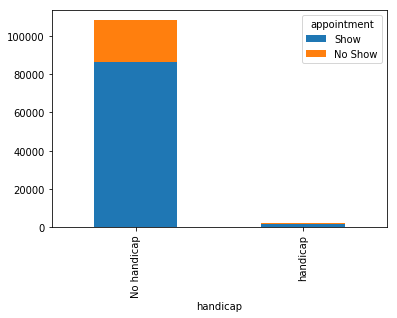

In [53]:
plot2=df_medical.groupby(['handicap','appointment']).hypertension.agg(['count'])
print(plot2)
df_medical.groupby(['handicap','appointment']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

<a id='8'></a>
<div class="alert alert-block alert-warning"> 
    <b>8- what the corrlation between (age/Apointment)and that will effect into of no-showing up at the appointment? </b></div>


                          count
age_category appointment       
0 - 2        Show          6124
             No Show       1306
3 - 19       Show         17546
             No Show       5435
20 - 39      Show         22190
             No Show       6680
40 - 59      Show          1101
             No Show        301
60 - 79      Show         38433
             No Show       8047
80 - 97      Show          2799
             No Show        546
98-115       Show            14
             No Show          4


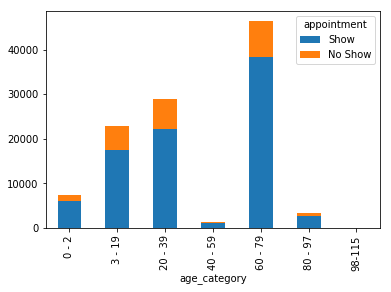

count    38433
dtype: int64


In [54]:
plot2=df_medical.groupby(['age_category','appointment']).hypertension.agg(['count'])
print(plot2)
df_medical.groupby(['age_category','appointment']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
print(plot2.max())

- 60 - 79      Show         38433
#### observation 
<p><b>as in general in this interval 60-79 most patient appear show appointment with no any diseases they have</p></b>

<a id='9'></a>
<div class="alert alert-block alert-warning"> 
    <b>9- what the corrlation between (age / Handcap)and that will effect into of no-showing up at the appointment?</b></div>


                          count
age_category handicap          
0 - 2        No handicap   7427
             handicap         3
3 - 19       No handicap  22692
             handicap       289
20 - 39      No handicap  28418
             handicap       452
40 - 59      No handicap   1391
             handicap        11
60 - 79      No handicap  45254
             handicap      1226
80 - 97      No handicap   3091
             handicap       254
98-115       No handicap     12
             handicap         6


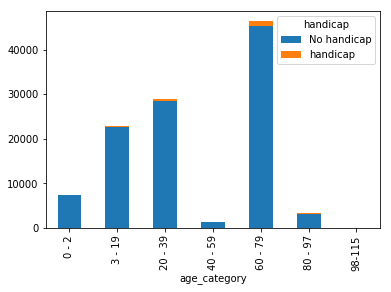

In [55]:
plot2=df_medical.groupby(['age_category','handicap']).hypertension.agg(['count'])
print(plot2)
df_medical.groupby(['age_category','handicap']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

as in general in this interval 60-79 most patient appear show appointment with no any handicap

<a id='10'></a>
<div class="alert alert-block alert-warning"> 
    <b>10-what the corrlation between (age / gender)and that will effect into of no-showing up at the appointment </b></div>


                                 count
age_category gender appointment       
0 - 2        Female Show          2934
                    No Show        632
             Male   Show          3190
                    No Show        674
3 - 19       Female Show          9553
                    No Show       2958
             Male   Show          7993
                    No Show       2477
20 - 39      Female Show         16047
                    No Show       4850
             Male   Show          6143
                    No Show       1830
40 - 59      Female Show           715
                    No Show        208
             Male   Show           386
                    No Show         93
60 - 79      Female Show         26081
                    No Show       5577
             Male   Show         12352
                    No Show       2470
80 - 97      Female Show          1904
                    No Show        365
             Male   Show           895
                    No Sh

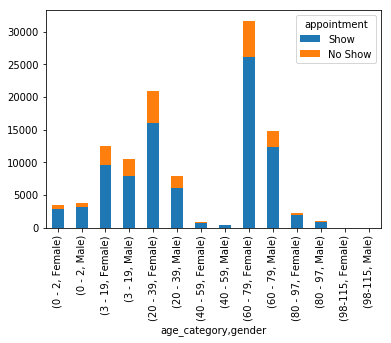

count    26081
dtype: int64


In [56]:
plot2=df_medical.groupby(['age_category','gender','appointment']).appointment.agg(['count'])
print(plot2)
df_medical.groupby(['age_category','gender','appointment']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
print(plot2.max())

another methode 

In [63]:
import seaborn as sns
ax=sns.catplot(x='age_category',hue='gender',col='appointment',data=df_medical,kind="count",palette='viridis')
plt.rcparams['gigure.figsize']=10,10
plt.subplots_adjust(top=0.8)#move position of title
ax.fig.suptitle('correlation between Age/Gender and Attendence');#plot main title
#print data:
df_medical.groupby(['age_category','gender','appointment']).appointment.agg(['count'])


AttributeError: module 'seaborn' has no attribute 'catplot'

- 60 - 79      Female Show         26081
- i think femal most frequency appear in show appoint specially in the interval from 60-79 that highest number 26081


<a id='conclusions'></a>
## Conclusions
Regarding for my introduction i choose 8 indpendent variable and one depenent varaible so after analysis the data by check for any missing data or any doublicated values i also ignore the outliers values like for up- normal value in age -1 so i will give you breife describtion about my result 

- no-showing rate is 20.2%, less than the overall show-up rate (79.8%).
- The percentage of females is greater than males _ 65% > 35%.
- 0 - 2        Female   3566 and Male     3864 they are  almost equal 
- 46480  in [60 - 79] category, which represents 42.1 % of the total
- as in general in this interval 60-79 most patient appear show appointment with no any handicap
- 60 - 79 No Hypertension Show 23582
- most frequency ages between 60-79 for No Hypertension and appear in appointment that mean that in this interval of that age  not has any Hypertension able to show an appointment
- the two categories ([0 - 39] and [60 - 79]) are the most frequent, the category of  the least frequent. [98-115] outlier data and i recommend to drop but i saved it
- observation: i think the duration of children i think male and female the same but after that the number of distribution for female more than the males because :
- finally i think most probabily appear in an appointment depend on no any disease they have but i think also most interval also from 60  to 79 years 
<b>i think femal most frequency appear in show appoint specially in the interval from 60-79 that highest number 26081</b>
### References
- https://pandas.pydata.org/
- https://numpy.org/
- https://matplotlib.org
- https://www.kaggle.com/
- https://github.com/
- https://classroom.udacity.com/courses/ud170-nd
- https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
- https://www.geeksforgeeks.org/


In [82]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0